# Joke Bot using Small LLM Fine-tuning
- JokeBot is an AI-powered joke generator that creates contextually relevant, short-form humor using a fine-tuned Phi-2 model. The project demonstrates end-to-end LLM customization from data preparation to deployment.
- It is achieved by fine-tuning the "microsoft/phi-2" model on 4 safe categories ("tech", "coffee", "foodie", "animals") of Jokes.
- Demo available on HuggingFace Space using Gradio UI.

**Links**:
- Code Repository: Coming soon
- Model Repository: https://huggingface.co/nanditab35/phi-2-jokebot-peft
- Demo: https://huggingface.co/spaces/nanditab35/jokebot

### Table of Contents
1. Problem Statement
2. Solution by LLM Fine-tuning with QLoRA PEFT
3. Data Corpus
4. Brief Code Walkthrough for QLoRA on Phi-2 Model
5. How to Create Demo on HF Space using a Gradio app
6. Sample Results
7. References

### 1. Problem Statement
**Traditional LLMs struggle with**:
- Context-specific humor: Generic models lack domain-specific joke structures.
- Safety: Potential for generating offensive or inappropriate content.
- Resource efficiency: Large models are computationally expensive for specific tasks.

**Objective**: Create a specialized, efficient, and safe joke generation model that: Generates 4-5 line jokes in specific categories, that Operates efficiently on limited hardware and ensures content safety.

### 2. Solution by LLM Fine-tuning with QLoRA PEFT
**High-Level Approach**
- **Base Model**: Leveraged Microsoft's Phi-2 (2.7B parameters) as the foundation model.
- **Fine-tuning Method**: Implemented QLoRA (Quantized Low-Rank Adaptation), combined with 4-bit quantization, for parameter-efficient training.
- **Parameter Efficiency**: Only 46.93% of model parameters are trained via LoRA adapters, preventing overfitting on small datasets. Only the small adapter weights (∼52 MB) need to be stored and loaded. The original model size being ~5 GB (2.7B params).
- **Rapid Iteration**: Enables quick experimentation cycles with different training strategies.
- **Production-Ready**: Seamless integration with Hugging Face ecosystem for deployment.

**Technical Flow**
Input Prompt => Phi-2 (Frozen Base Model) => QLoRA Adapters (Trained) => Generate Joke
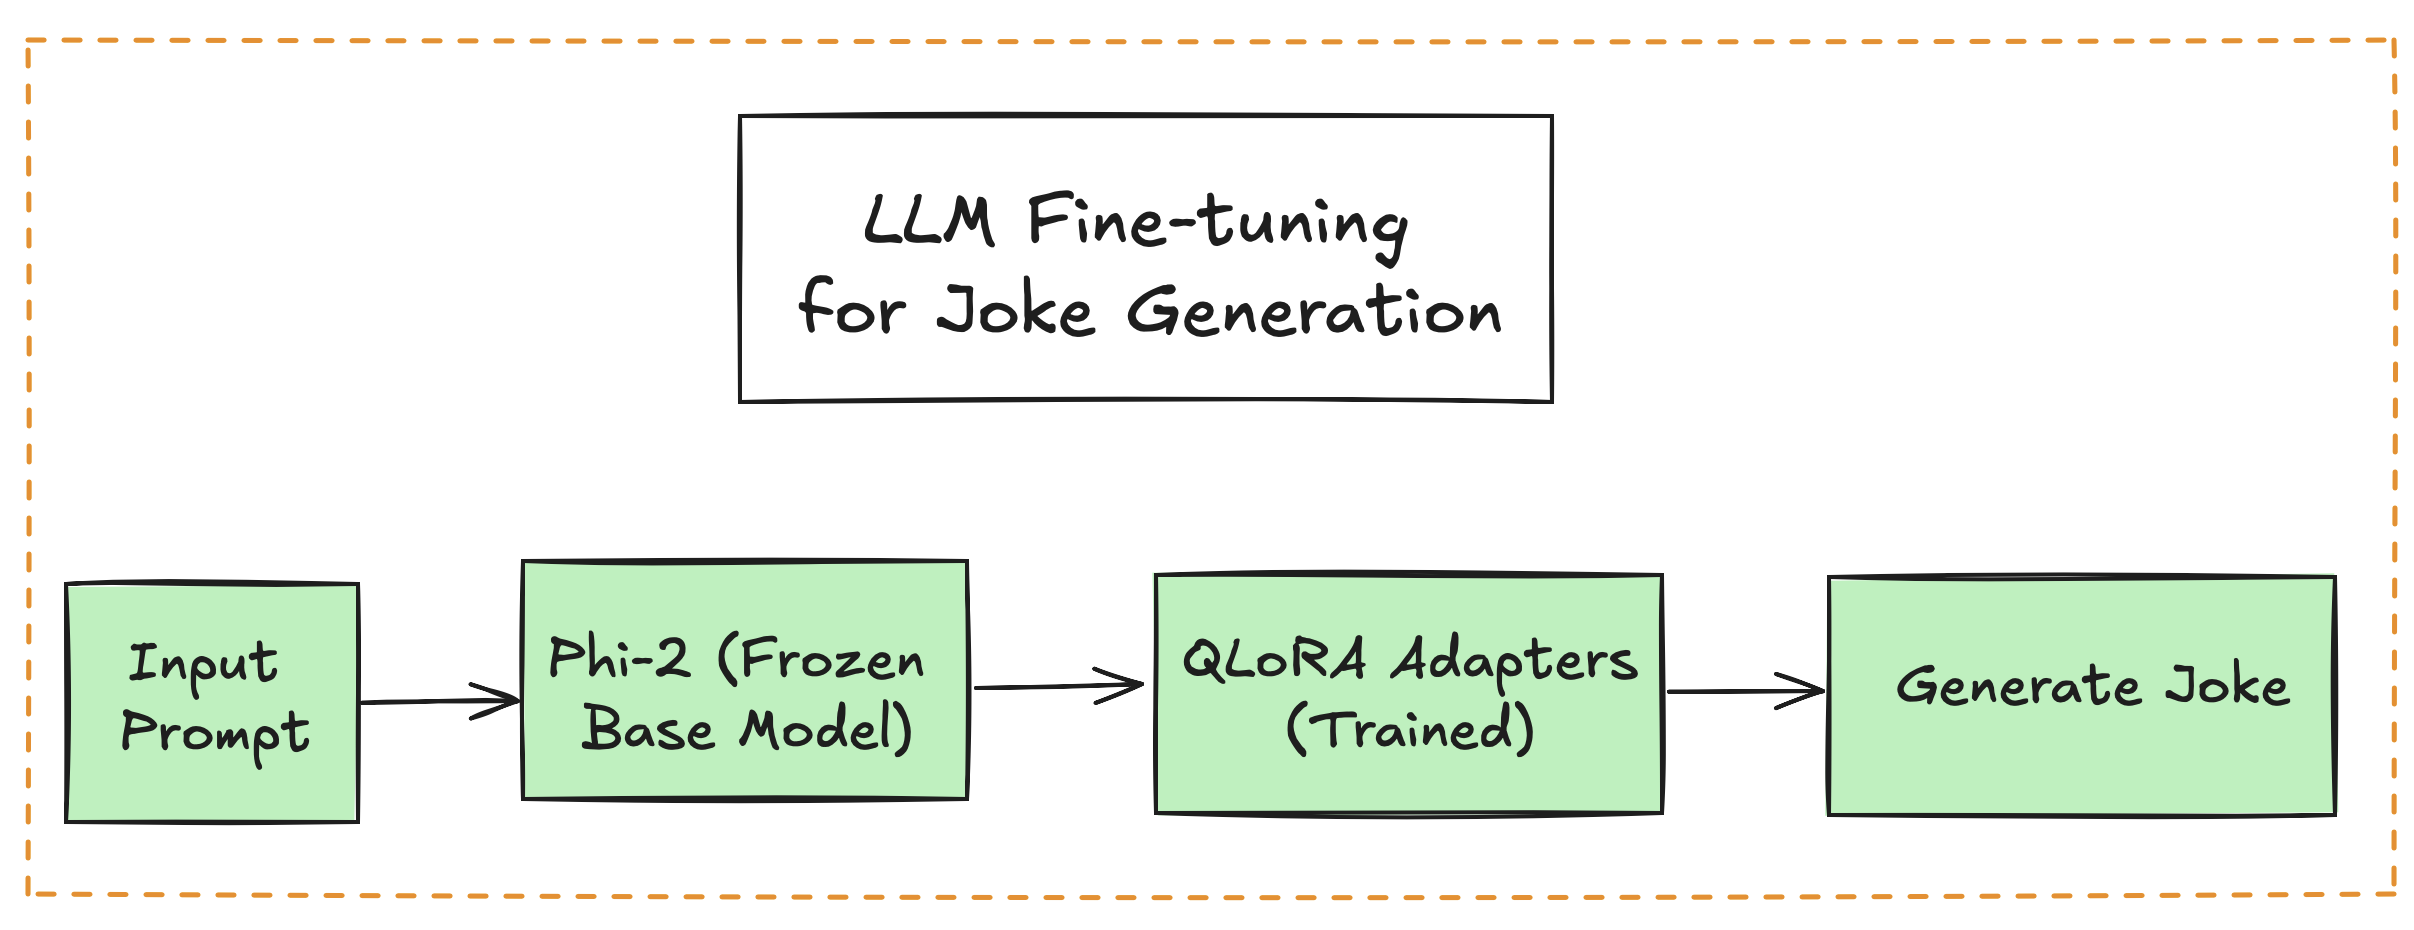

### 3. Data Corpus
**Dataset Strategy & Rationale**: Initial Consideration: Evaluated large-scale joke datasets (e.g., Fraser/short-jokes with 200k+ examples) but identified two key challenges:
- **Computational Cost**: Full dataset training would require significant time/resources on Colab free tier.
- **Quality Concerns**: Presence of offensive/inappropriate content requiring extensive filtering.

**Curated Dataset Approach**:
- **Targeted Creation**: Generated 400 high-quality examples (100 per category) across four safe topics: *["Technology & Programming", "Coffee & Beverages", "Food & Cooking", "Animals & Pets"]*.
- **Generation Method**: Used DeepSeek Chat with carefully crafted prompts to ensure:
    - **Consistent Format**: 4-5 line jokes with clear setup-punchline structure.
    - **Content Safety**: Explicit exclusion of offensive, controversial, or sensitive topics.
    - **Category Relevance**: Strict adherence to designated topic boundaries.

### 4. Brief Code Walkthrough for QLoRA on Phi-2 Model
**Key Dependencies**:
transformers, peft, bitsandbytes, torch, datasets

In [ ]:
# !pip install -qU transformers accelerate peft bitsandbytes datasets huggingface_hub

# import os
# import json
# import torch
# from transformers import (AutoModelForCausalLM, AutoTokenizer, TrainingArguments, Trainer, DataCollatorForLanguageModeling, BitsAndBytesConfig)
# from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training
# from datasets import Dataset

**Model Configuration**:

In [ ]:
# # Configure 4-bit quantization
# bnb_config = BitsAndBytesConfig(
#     load_in_4bit=True,
#     bnb_4bit_use_double_quant=True,
#     bnb_4bit_quant_type="nf4",
#     bnb_4bit_compute_dtype=torch.float16
# )

# # Configure LoRA
# lora_config = LoraConfig(
#     r=16,
#     lora_alpha=32,
#     target_modules=["Wqkv", "out_proj", "fc1", "fc2"],
#     lora_dropout=0.05,
#     bias="none",
#     task_type="CAUSAL_LM"
# )

**Training Setup**:

In [ ]:
# # Training arguments
# training_args = TrainingArguments(
#     output_dir="./phi-2-jokebot",
#     overwrite_output_dir=True,
#     per_device_train_batch_size=2,
#     gradient_accumulation_steps=4,
#     num_train_epochs=3,
#     learning_rate=2e-4,
#     weight_decay=0.01,
#     warmup_ratio=0.03,
#     logging_steps=10,
#     save_steps=500,
#     eval_steps=500,
#     save_total_limit=3,
#     prediction_loss_only=True,
#     remove_unused_columns=False,
#     fp16=True,
#     dataloader_pin_memory=False,
#     report_to="none",  # Disable wandb in Colab
# )

# # Create trainer
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=tokenized_dataset,
#     data_collator=DataCollatorForLanguageModeling(tokenizer, mlm=False),
# )

### 5. How to Create Demo on HF Space using a Gradio
**File Structure**: Given below is the basic directory structure of the HF Space repository for the Demo with Gradio UI.

In [ ]:
# jokebot/
# ├── app.py
# ├── requirements.txt
# ├── README.md
# └── .gitignore

**Requirements.txt**:

In [ ]:
# gradio>=4.0
# torch>=2.0.0
# transformers>=4.35.0
# accelerate>=0.24.0
# peft>=0.7.0
# bitsandbytes>=0.41.0
# safetensors>=0.4.0

**Key Gradio Compoents**: Showing the code for Simple UI in app.py inside HF Space repository.

In [ ]:
# # Interactive Interface
# with gr.Blocks(theme=gr.themes.Soft()) as demo:
#     gr.Markdown("# 🤖 JokeBot - AI Comedy Generator")

#     category = gr.Dropdown(choices=["tech", "coffee", "foodie", "animals"])
#     generate_btn = gr.Button("Generate Joke!")
#     output = gr.Textbox(label="Generated Joke", lines=5)

#     generate_btn.click(
#         fn=generate_joke,
#         inputs=[category],
#         outputs=output
#     )

**Deployment Steps**:
- Create HF Space with Gradio template
- Push code to Space repository
- Set model repository to public
- Configure hardware settings (CPU basic)

### 6. Sample Results
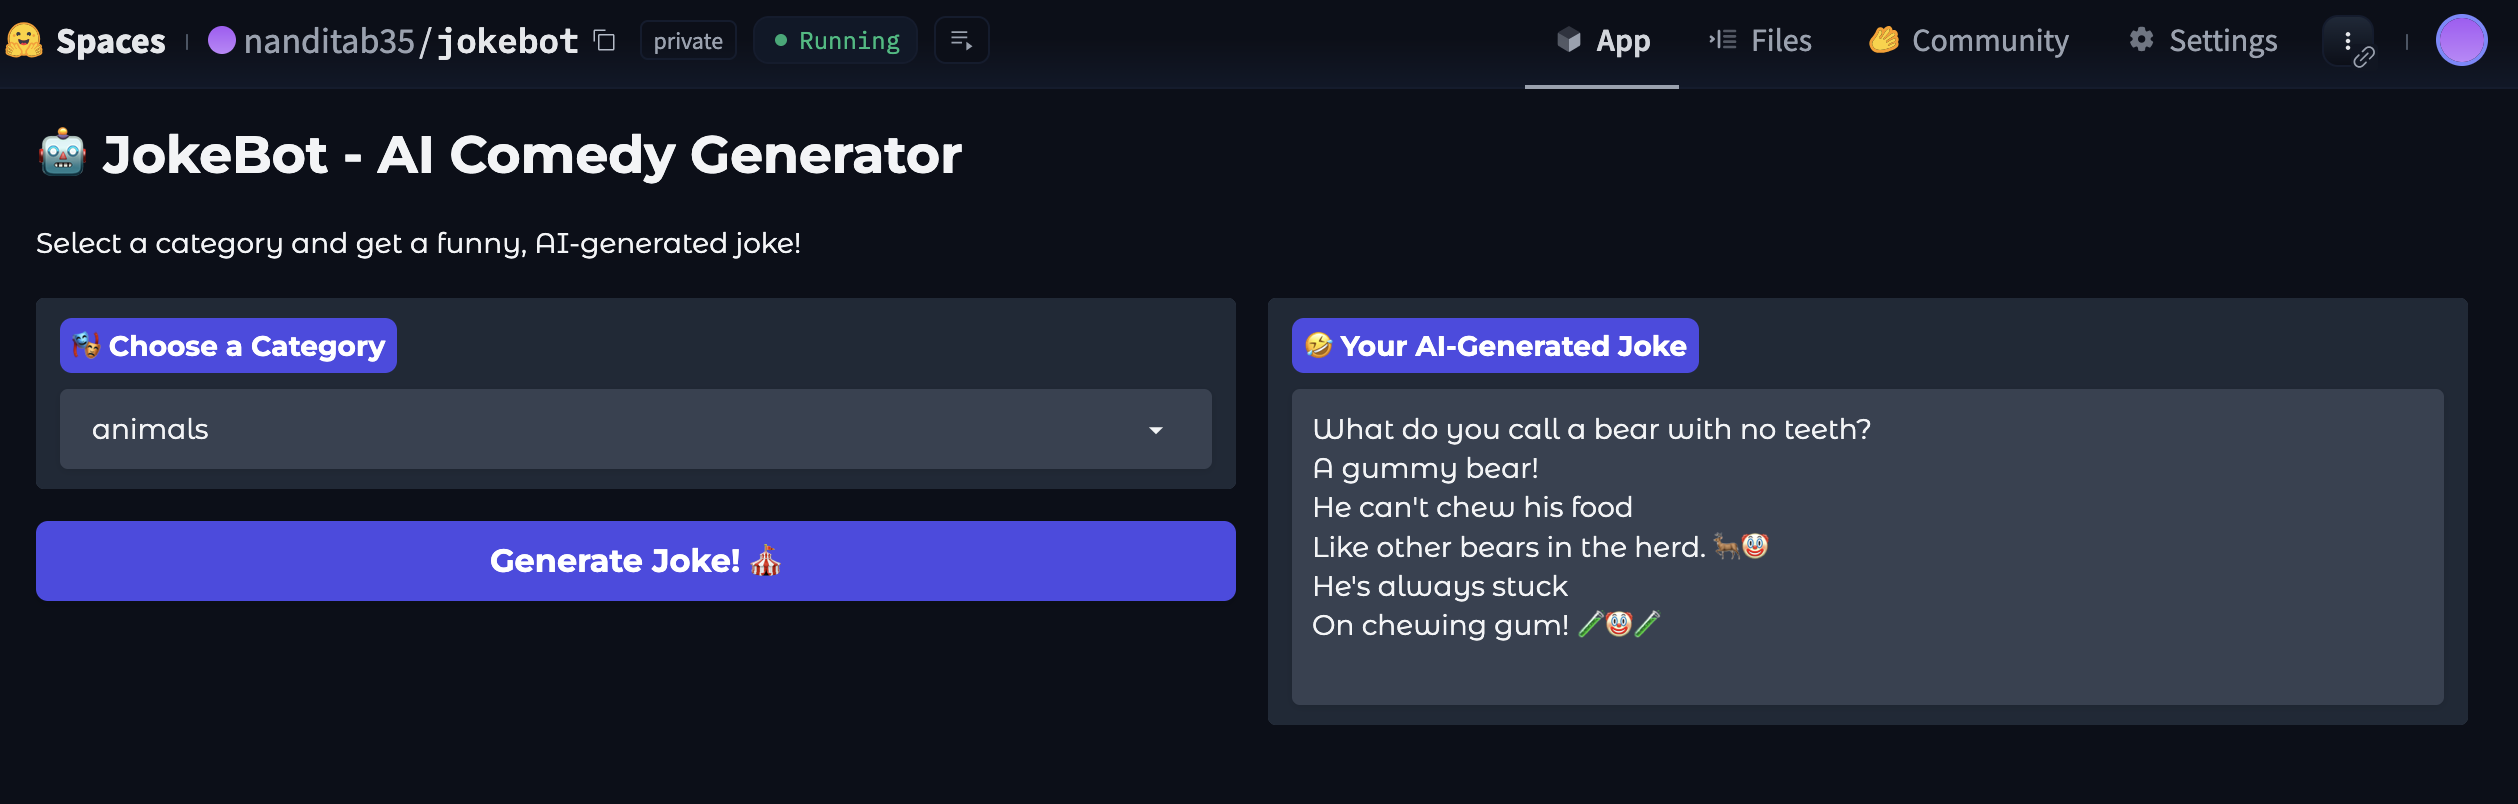

**Performance Metrics**:
- Inference Latency: 0.5-1 Minute (CPU basic). Inference is a little slow as it is currently using 2 vCPUs (Free Option) in Hugging Face Space.
- Safety: Restricting the joke category to a fixed set is done keeping the safety concern in mind.

### 7. References:
- Microsoft's Phi-2 Model: https://huggingface.co/microsoft/phi-2
- QLoRA paper: https://arxiv.org/abs/2305.14314
- HuggingFace PEFT Documentation: https://huggingface.co/docs/peft/index
- Gradio Documentation: https://www.gradio.app/docs
- HuggigFace Spaces: https://huggingface.co/spaces